# With syntetic market price

Here with an Heston model.

In [1]:
from hestonpy.models.heston import Heston
from hestonpy.models.bates import Bates
from hestonpy.models.calibration.volatilitySmile import VolatilitySmile

import matplotlib.pyplot as plt 
import numpy as np

r = 0.00

Some parameters

In [2]:
spot = 100
time_to_maturity = 1
true_params = {
    "vol_initial": 0.06,
    "kappa": 1.25,
    "theta": 0.06,
    "sigma": 0.6,
    "rho": -0.5,
    "drift_emm": 0.00,
}
vol = np.sqrt(0.04)

heston = Heston(spot=spot, r=r, **true_params)
price_function = heston.call_price

strikes = np.linspace(70, 140, 10) 

## Without noise

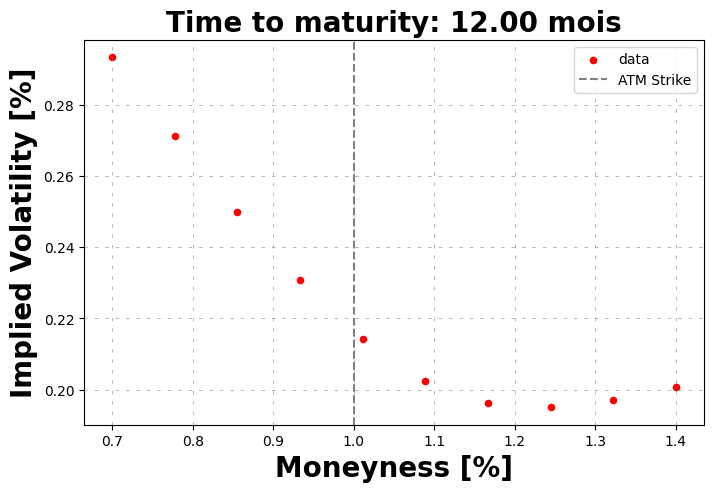

In [3]:
market_prices = price_function(**true_params, strike=strikes, time_to_maturity=time_to_maturity, s=spot)

volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

### Local optimization

Calibrated parameters: v0=0.046 | kappa=0.985 | theta=0.085 | sigma=0.580 | rho=-0.506



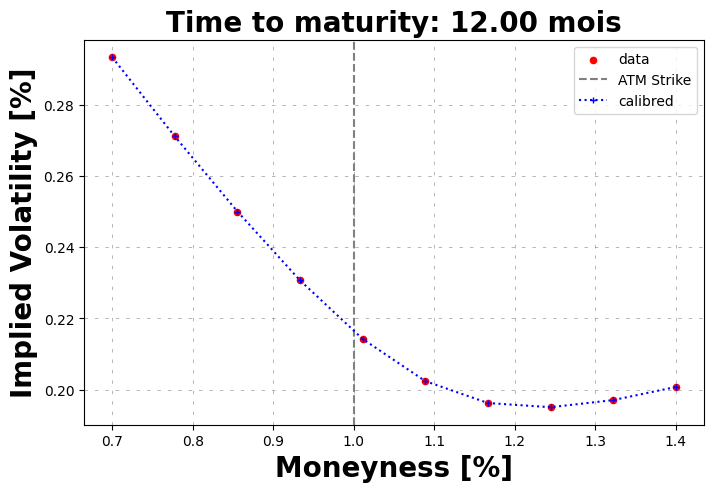

{'vol_initial': np.float64(0.04589503493265889),
 'kappa': np.float64(0.9849851420478373),
 'theta': np.float64(0.08456116488309652),
 'sigma': np.float64(0.580145120734101),
 'rho': np.float64(-0.5063722128514593),
 'drift_emm': 0}

In [4]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    initial_guess = [1.0, 0.03, 0.4, -0.5],
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

In [5]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'sigma': 0.6,
 'rho': -0.5,
 'drift_emm': 0.0}

### Global optimization

In [6]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    initial_guess = [1.0, 0.03, 0.4, -0.5],
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

at minimum 0.000002 accepted 1
Parameters: kappa=0.985 | theta=0.085 | sigma=0.580 | rho=-0.506 



KeyboardInterrupt: 

In [ ]:
true_params

{'vol_initial': 0.06,
 'kappa': 1.25,
 'theta': 0.06,
 'sigma': 0.6,
 'rho': -0.5,
 'drift_emm': 0.0}

## With noise

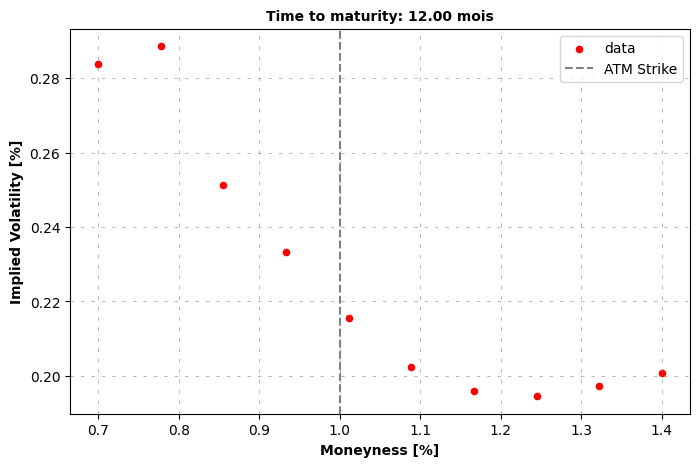

In [ ]:
market_prices = market_prices * (1 + np.random.normal(scale=0.01, size=len(market_prices)))  # a little of market noise
volSmile = VolatilitySmile(
    strikes=strikes,
    time_to_maturity=time_to_maturity,
    atm=spot,
    market_prices=market_prices,
    r=r
)
volSmile.plot()

### Local optimization

Calibrated parameters: v0=0.046 | kappa=0.021 | theta=1.476 | sigma=0.417 | rho=-0.542



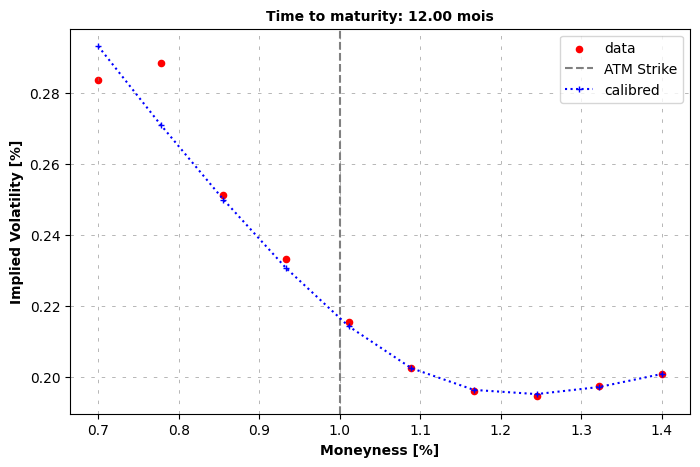

{'vol_initial': np.float64(0.04647240867107085),
 'kappa': np.float64(0.02057993693658569),
 'theta': np.float64(1.475751237282687),
 'sigma': np.float64(0.41671804646099125),
 'rho': np.float64(-0.5417957836420847),
 'drift_emm': 0}

In [ ]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    initial_guess = [1.0, 0.03, 0.4, -0.5],
    guess_correlation_sign='negative',
    speed='local',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params

### Global optimization

at minimum 0.014711 accepted 1
Parameters: kappa=0.021 | theta=1.476 | sigma=0.417 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.019 | theta=1.627 | sigma=0.416 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.021 | theta=1.467 | sigma=0.417 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.019 | theta=1.576 | sigma=0.416 | rho=-0.542 

at minimum 0.014710 accepted 1
Parameters: kappa=0.015 | theta=1.967 | sigma=0.416 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.017 | theta=1.818 | sigma=0.416 | rho=-0.542 

at minimum 0.014710 accepted 1
Parameters: kappa=0.015 | theta=2.006 | sigma=0.416 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.018 | theta=1.685 | sigma=0.416 | rho=-0.542 

at minimum 0.014715 accepted 1
Parameters: kappa=0.041 | theta=0.777 | sigma=0.421 | rho=-0.542 

at minimum 0.014711 accepted 1
Parameters: kappa=0.018 | theta=1.705 | sigma=0.416 | rho=-0.542 

at minimum 0.014711 

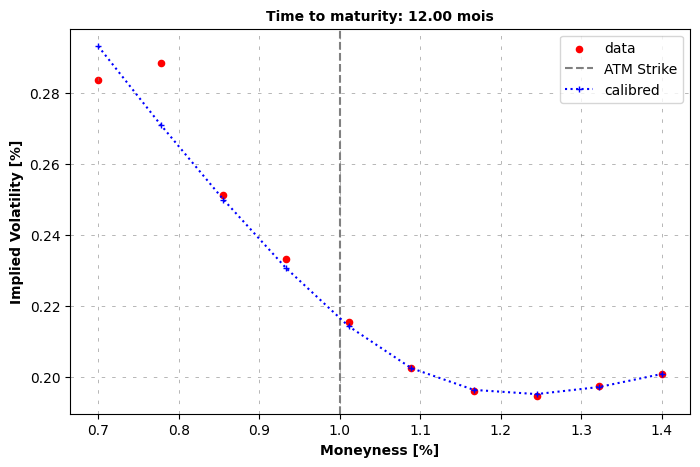

{'vol_initial': np.float64(0.04647240867107085),
 'kappa': np.float64(0.014974674425261712),
 'theta': np.float64(2.0063921582063933),
 'sigma': np.float64(0.41561958352269357),
 'rho': np.float64(-0.5419272956890451),
 'drift_emm': 0}

In [ ]:
calibrated_params = volSmile.calibration(
    price_function=price_function,
    initial_guess = [1.0, 0.03, 0.4, -0.5],
    guess_correlation_sign='negative',
    speed='global',
)
calibrated_heston = Heston(spot=spot, r=r, **calibrated_params)
volSmile.plot(calibrated_prices=heston.call_price(strike=strikes, time_to_maturity=time_to_maturity))
calibrated_params